In [2]:
import os, sys
os.chdir(r"D:\User\Desktop\dl_project")
sys.path.insert(0, os.getcwd())
print(os.getcwd())

D:\User\Desktop\dl_project


In [2]:
import torch
from src.section4_data_torch import DataCfg
from src.section4_train_torch import TrainCfg, exp_resnet_vs_plain, exp_transfer_learning, exp_augmentation_effect

device = "cuda" if torch.cuda.is_available() else "cpu"
print("device:", device)

device: cpu


In [3]:
data_cfg = DataCfg(root="./data", img_size=96, batch_size=16, num_workers=0, val_ratio=0.2)

train_cfg = TrainCfg(epochs=3, lr=1e-3, weight_decay=1e-4, device="cpu", optimizer="sgd_momentum")

[PlainNet] Epoch 1/3 train_loss=0.6197 train_acc=0.6755 val_acc=0.6820
[PlainNet] Epoch 2/3 train_loss=0.6109 train_acc=0.6775 val_acc=0.6720
[PlainNet] Epoch 3/3 train_loss=0.5979 train_acc=0.6915 val_acc=0.6840


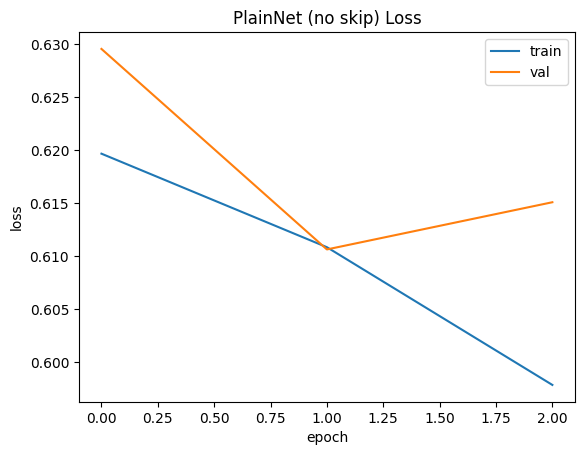

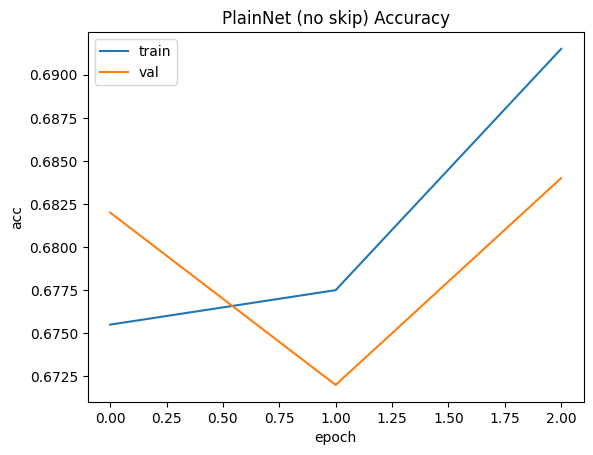

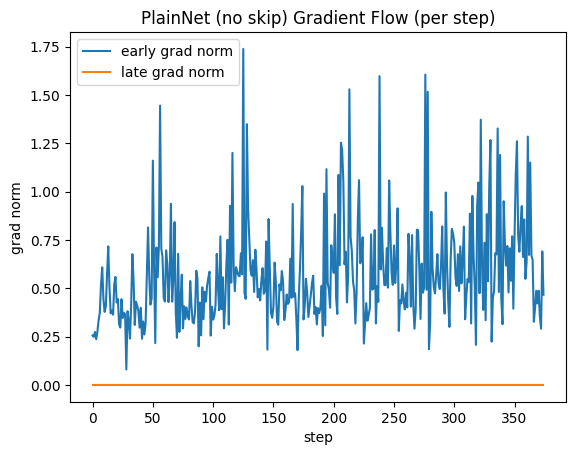

[SmallResNet] Epoch 1/3 train_loss=0.6250 train_acc=0.6705 val_acc=0.6780
[SmallResNet] Epoch 2/3 train_loss=0.6041 train_acc=0.6805 val_acc=0.6860
[SmallResNet] Epoch 3/3 train_loss=0.5988 train_acc=0.6880 val_acc=0.6920


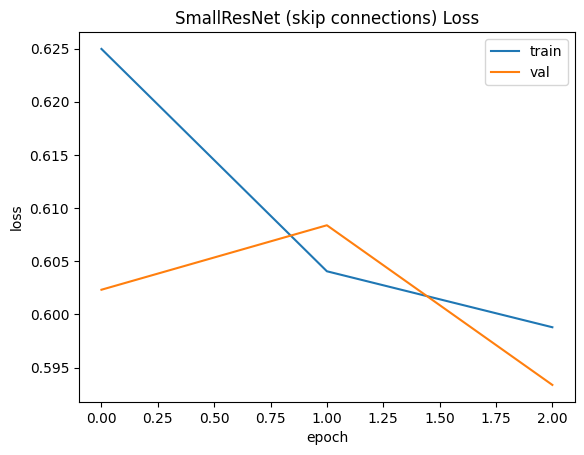

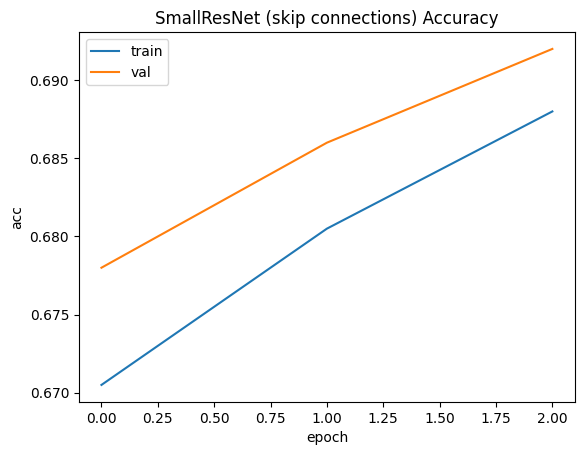

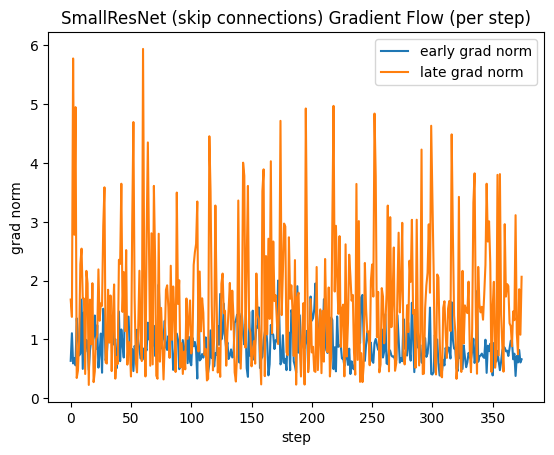

In [4]:
h_plain, h_res = exp_resnet_vs_plain(data_cfg, train_cfg, augment=True)

[SmallResNet] Epoch 1/3 train_loss=0.6276 train_acc=0.6655 val_acc=0.6760
[SmallResNet] Epoch 2/3 train_loss=0.5990 train_acc=0.6885 val_acc=0.6840
[SmallResNet] Epoch 3/3 train_loss=0.5933 train_acc=0.6940 val_acc=0.6920


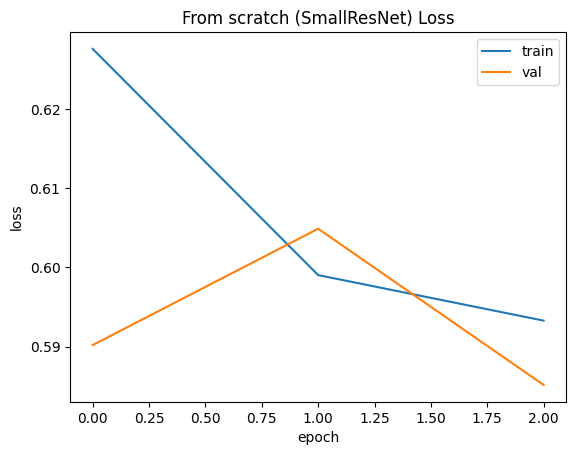

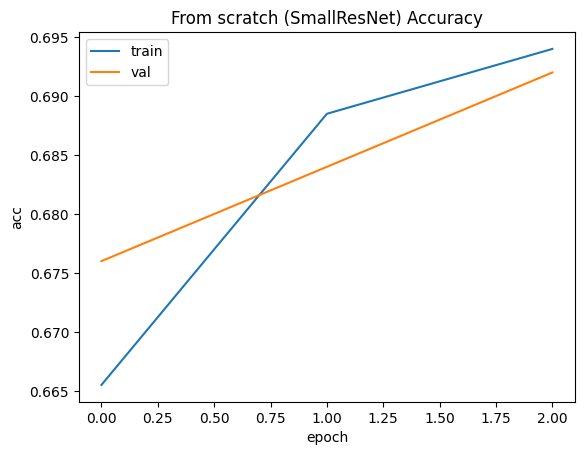

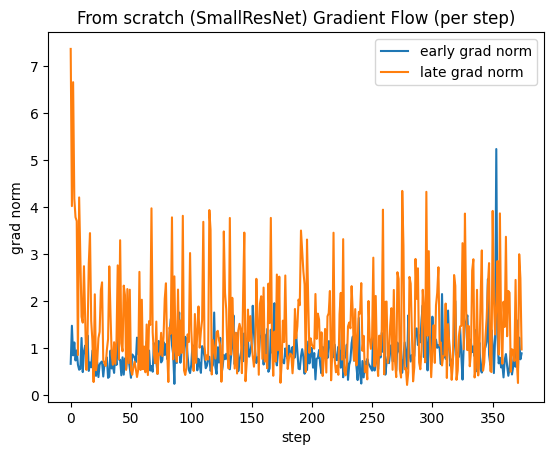

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\User/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:04<00:00, 10.0MB/s]


[ResNet] Epoch 1/3 train_loss=0.4928 train_acc=0.7555 val_acc=0.7940
[ResNet] Epoch 2/3 train_loss=0.4298 train_acc=0.7980 val_acc=0.8000
[ResNet] Epoch 3/3 train_loss=0.4085 train_acc=0.8140 val_acc=0.8100


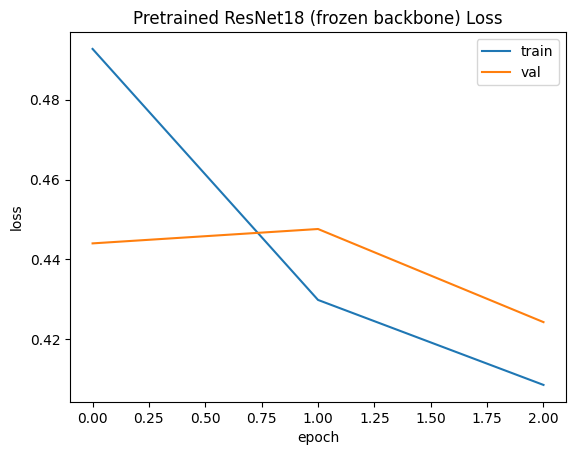

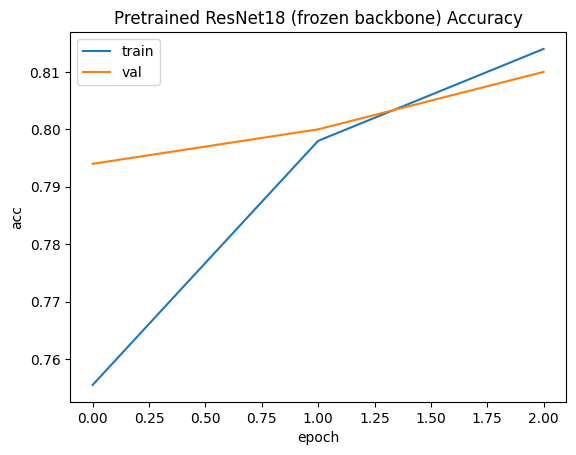

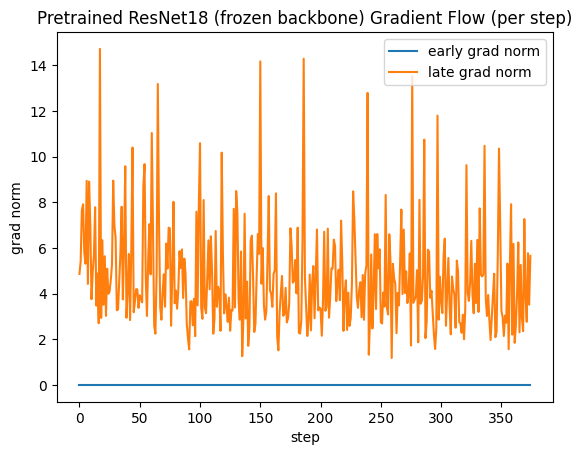

[ResNet] Epoch 1/3 train_loss=0.4673 train_acc=0.7780 val_acc=0.8640
[ResNet] Epoch 2/3 train_loss=0.2891 train_acc=0.8710 val_acc=0.8820
[ResNet] Epoch 3/3 train_loss=0.2515 train_acc=0.8875 val_acc=0.9020


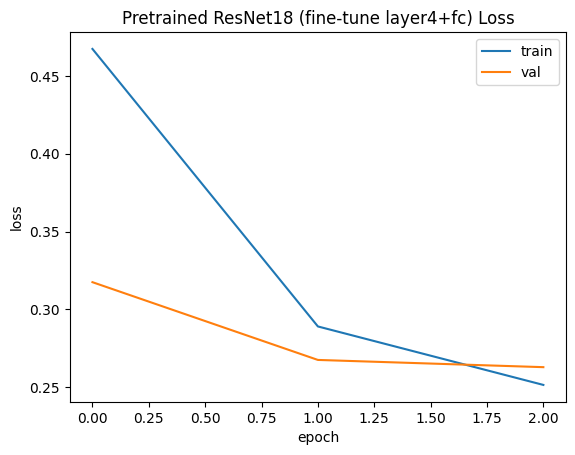

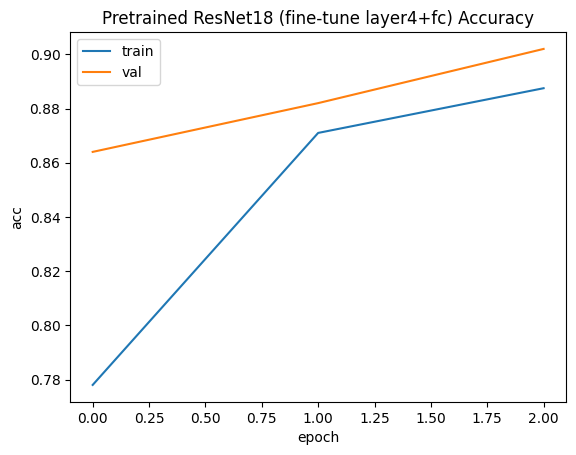

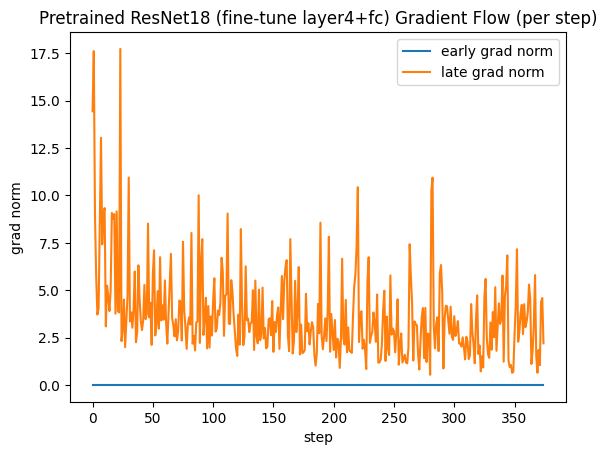

In [5]:
h_scratch, h_frozen, h_ft = exp_transfer_learning(data_cfg, train_cfg, augment=True)

[SmallResNet] Epoch 1/3 train_loss=0.6175 train_acc=0.6765 val_acc=0.6860
[SmallResNet] Epoch 2/3 train_loss=0.5984 train_acc=0.6815 val_acc=0.6820
[SmallResNet] Epoch 3/3 train_loss=0.5929 train_acc=0.6845 val_acc=0.6900
[SmallResNet] Epoch 1/3 train_loss=0.6323 train_acc=0.6715 val_acc=0.5880
[SmallResNet] Epoch 2/3 train_loss=0.6021 train_acc=0.6745 val_acc=0.6720
[SmallResNet] Epoch 3/3 train_loss=0.5973 train_acc=0.6875 val_acc=0.6680


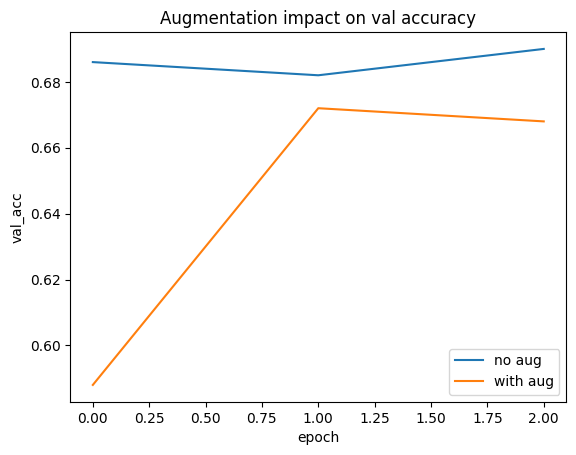

In [6]:
h_noaug, h_aug = exp_augmentation_effect(data_cfg, train_cfg)